## Imports

In [143]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer, MinMaxScaler, LabelBinarizer, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [144]:
def plot_acc_loss(acc, loss):
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(acc)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.subplot(1,2,2)
    plt.plot(loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

In [104]:
def data_titanic_processing(data):
    # retirando dados desnecessários e divindo dados e labels
    data.drop(labels=['Name', 'Ticket', 'PassengerId'],axis=1, inplace=True)
    data = data.dropna()
    data_x, data_y = data.drop(labels='Survived', axis=1), data['Survived']
    data_y = np.array(data_y).reshape(-1,1)
    
    # Tratando dados númericos e categoricos
    data_x_numerical = data_x.drop(labels=['Sex', 'Cabin', 'Embarked'], axis=1)
    scaler = MinMaxScaler(feature_range=(0,1))
    data_x_numerical.loc[:,['Age', 'Fare']] = scaler.fit_transform(data_x_numerical[['Age', 'Fare']])
    data_x_categorical = data_x[['Sex', 'Cabin', 'Embarked']]
    binarizer = LabelBinarizer()
    encoder = LabelEncoder()
    data_x_categorical.loc[:,'Sex'] = binarizer.fit_transform(data_x_categorical['Sex'])
    data_x_categorical.loc[:,'Cabin'] = encoder.fit_transform(data_x_categorical['Cabin'])
    data_x_categorical.loc[:,'Cabin'] = scaler.fit_transform(data_x_categorical['Cabin'].reshape(-1,1))
    data_x_categorical.loc[:,'Embarked'] = encoder.fit_transform(data_x_categorical['Embarked'])
    
    # Merge dos dados categoricos e númericos tratados
    data_x_categorical = data_x_categorical.reset_index()
    data_x_numerical = data_x_numerical.reset_index()
    data_tr = data_x_categorical.merge(data_x_numerical, on='index')
    data_tr.drop(['index'], axis=1, inplace=True)
    
    return data_tr, data_y
    
def data_test_titanic_processing(data):
    # retirando dados desnecessários e divindo dados e labels
    data.drop(labels=['name', 'ticket', 'boat', 'body', 'home.dest'],axis=1, inplace=True)
    data = data.dropna()
    data_x, data_y = data.drop(labels='survived', axis=1), data['survived']
    data_y = np.array(data_y).reshape(-1,1)
    
    # Tratando dados númericos e categoricos
    data_x_numerical = data_x.drop(labels=['sex', 'cabin', 'embarked'], axis=1)
    scaler = MinMaxScaler(feature_range=(0,1))
    data_x_numerical.loc[:,['age', 'fare']] = scaler.fit_transform(data_x_numerical[['age', 'fare']])
    data_x_categorical = data_x[['sex', 'cabin', 'embarked']]
    binarizer = LabelBinarizer()
    encoder = LabelEncoder()
    data_x_categorical.loc[:, 'sex'] = binarizer.fit_transform(data_x_categorical['sex'])
    data_x_categorical.loc[:, 'cabin'] = encoder.fit_transform(data_x_categorical['cabin'])
    data_x_categorical.loc[:, 'cabin'] = scaler.fit_transform(data_x_categorical['cabin'].reshape(-1,1))
    data_x_categorical.loc[:, 'embarked'] = encoder.fit_transform(data_x_categorical['embarked'])
    
    # Merge dos dados categoricos e númericos tratados
    data_x_categorical = data_x_categorical.reset_index()
    data_x_numerical = data_x_numerical.reset_index()
    data_tr = data_x_categorical.merge(data_x_numerical, on='index')
    data_tr.drop(['index'], axis=1, inplace=True)
    
    return data_tr, data_y

## Leitura do dataset

In [65]:
data = pd.read_csv('dataset/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Análise e pré-processamento dos dados

É necessário fazer um pré-processamento dos dados antes de usa-lo na nossa rede

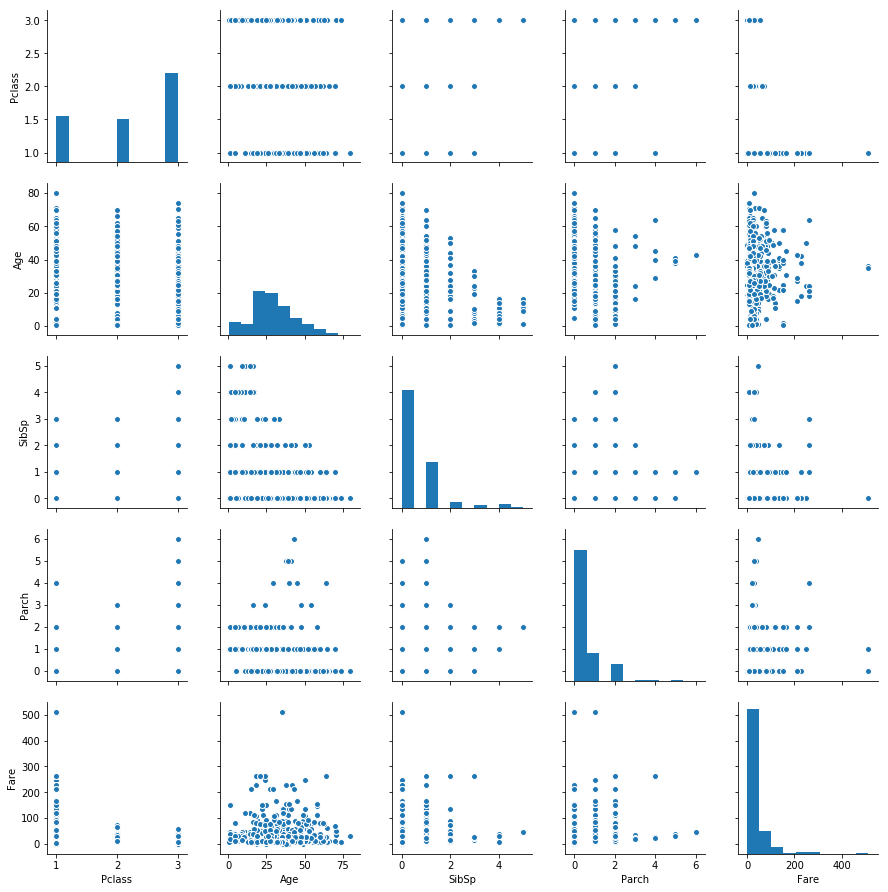

In [74]:
data_plot = data.drop(labels=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data_plot = data_plot.dropna()
sns.pairplot(data_plot)

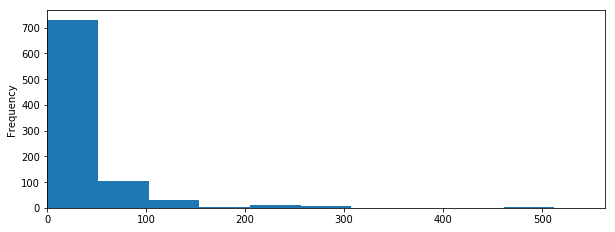

In [35]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.xlim(data['Fare'].min(), data['Fare'].max()*1.1)

data['Fare'].plot(kind='hist')

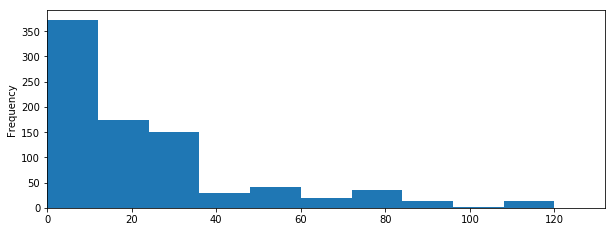

In [36]:
data = data[np.abs(data['Fare'] - data['Fare'].mean()) <= (2 * data['Fare'].std())]

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.xlim(data['Fare'].min(), data['Fare'].max()*1.1)

data['Fare'].plot(kind='hist')

## Correlação entre os atributos

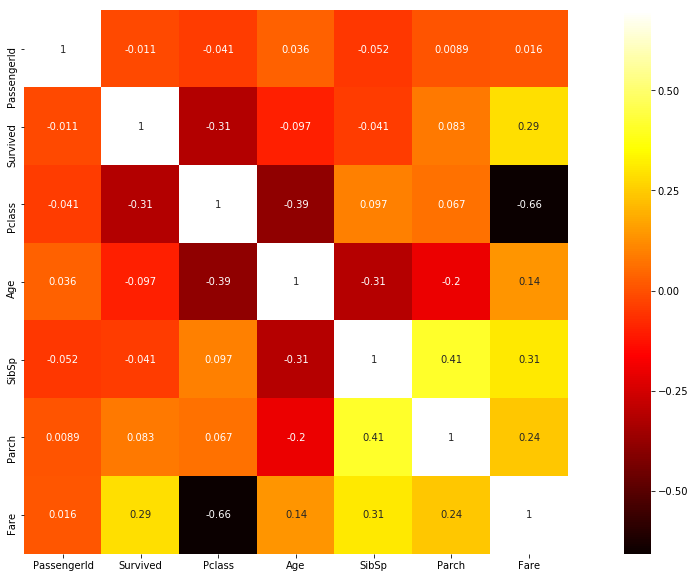

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), vmax=0.7,  square=True,  annot=True,  cmap="hot")

In [ ]:
y_pred = model.predict(data_test_x)

print(accuracy_score(data_test_y, y_pred))
print(confusion_matrix(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))

data.drop(labels=['Name', 'Ticket', 'PassengerId'],axis=1, inplace=True)
data = data.dropna()
data.head()

In [103]:
data_test = pd.read_excel('dataset/titanic3.xls')
data_test_x, data_test_y = data_test_titanic_processing(data_test)

C:\Users\Diogo\AppData\Local\conda\conda\envs\tensorflowgpu\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Diogo\AppData\Local\conda\conda\envs\tensorflowgpu\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Diogo\AppData\Local\conda\conda\envs\tensorflowgpu\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: reshape is deprecated and will raise in a subsequent

In [105]:
data = pd.read_csv('dataset/train.csv')
data_x, data_y = data_titanic_processing(data)

C:\Users\Diogo\AppData\Local\conda\conda\envs\tensorflowgpu\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Diogo\AppData\Local\conda\conda\envs\tensorflowgpu\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Diogo\AppData\Local\conda\conda\envs\tensorflowgpu\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent

## Validação Cruzada

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_162 (Dense)            (None, 30)                270       
_________________________________________________________________
dense_163 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_164 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_165 (Dense)            (None, 1)                 21        
Total params: 1,913
Trainable params: 1,913
Non-trainable params: 0
_________________________________________________________________
None
Train on 146 samples, validate on 37 samples
Epoch 1/10
146/146 [==============================] - 2s 11ms/step - loss: 0.6774 - acc: 0

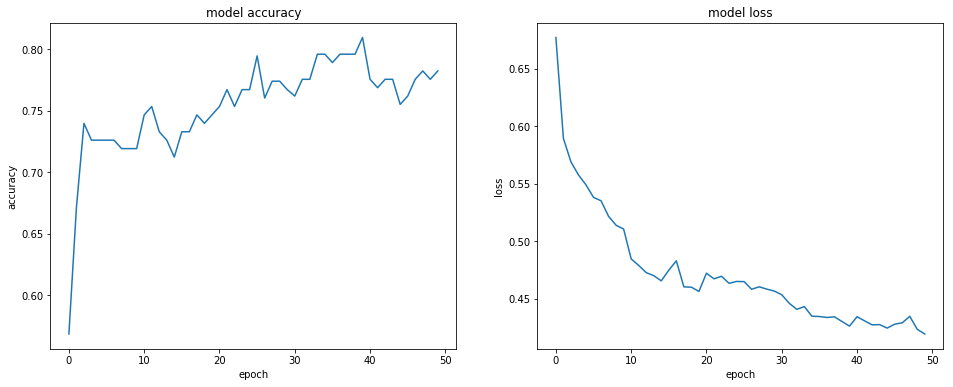

In [145]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

D_in, D_out = data_x.shape[1], data_x.shape[0]
model = Sequential()
model.add(Dense(units=D_in, activation='linear', input_shape=(data_x.shape[1],)))
model.add(Dense(units=30, activation='tanh'))
model.add(Dense(units=30, activation='tanh'))
model.add(Dense(units=20, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
print(model.summary())
acc_track = []
loss_track = []

x_train, y_train = data_x.values, data_y
x_test, y_test = data_test_x.values, data_test_y
for train, test in kfold.split(x_train, y_train):
    history = model.fit(x=x_train[train], y=y_train[train], epochs=10, batch_size=10, verbose=1, validation_data=(x_test[test], y_test[test]))

    for acc, loss in zip(history.history['acc'], history.history['loss']):
        acc_track.append(acc)
        loss_track.append(loss)

plot_acc_loss(acc_track, loss_track)

0.7703703703703704
             precision    recall  f1-score   support

          0       0.66      0.66      0.66        90
          1       0.83      0.83      0.83       180

avg / total       0.77      0.77      0.77       270



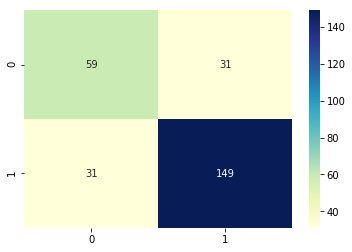

In [146]:
y_pred = model.predict(data_test_x)
y_pred = np.where(y_pred > 0.5, 1, 0)

print(accuracy_score(data_test_y, y_pred))
plt.subplot(111)
sns.heatmap(confusion_matrix(data_test_y, y_pred), annot=True, fmt='d', cmap="YlGnBu")
print(classification_report(data_test_y, y_pred))